<a href="https://colab.research.google.com/github/Graciliana/ExercicioDosEstudos-Python_Colab/blob/master/Projeto_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que podemos apreder com o Titanic ainda hoje - Data Science Project
<p>Graciliana Kascher</p>
<p>31 de julho de 2020.</p>
Qual classe do navio teve mais chance de sobrevivência? Os empregados sobreviveram? As Mulheres e crianças todas sobreviveram? Será que a posição no navio determinou a morte ou a vida dos pessoas? Vamos tentar responder estas perguntas utilizando dados reais.
<br>
O <b>RMS Titanic</b> foi um navio de passageiro britânico que começou sua construção em março de 1909 e foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando a lenda que nem Deus o afundaria.
A embarcação partiu em sua primeira e única viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, realizou paradas em Cherbourg-Octeville na França e por Queenstow na Irlanda. Sendo que no dia 14 de abril às 23 horas e 40 minutos ele se colidiu com um iceberg afundando na madrugada do dia seguite com mais  de 1500 pessoas a bordo, um dos maiores desastres marítimos da história.  

Seu naufráfio destacou vários pontos fracos de seu projeto, deficiencias nos procedimentos de evacuação de emerg~encia e falhas nas regulamentações marítimas da época. Comissão de inquerito foram instauradas nos Estados Unidos e no Reino Unido, provocando mudanças nas leis internacionais de navegação que permanecem em vigor a mais de um século depois.




# Apresentação dos Dados 

Esse estudo estará utilizando dados coletados do site https://www.kaggle.com/c/titanic. Com base nas informações dispostas nesse dataset, realizarei Insigjhts acerca dos tripulantes e das circusntancias que envolveram a tragédia. Vale lembrar que tal conjunto de dados não abriga informação de todos os passageiros, mas sim de apenas 891.

OUtro proposto é realizar um aplicativo em que se coloca alguns dados como idade, Genero e classe social e ele te informaria qual  seria a probabilidade da pessoa sobreviver o naufrafio do titanic.

## Perguntas a serem respondidas:


*   Qauntas pessoas sobreviveram ao desastre, segundo este dataset?
*   A classe social que teve mais sobreviventes?
*   Qual foi porporção de Mulheres e homens que sobreviveram a tragedia?
*   Todas as meninas da primeira classe sobreviveram?








###Conhecendo a base Dados Montar Drive para para trabalhar no google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importando as bibliotecas básicas


In [3]:
#Algebra Linear
import numpy as np


#Processamento/ manipulação dos dados
import pandas as pd

# Visualização dos dados 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


#seleção de valores aleatórios par plotagem
import random


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Obtendo os dados para analise

In [4]:
#importando os dados para analise
titanic = pd.read_csv('/content/drive/My Drive/Titanic/titanic_data.csv')
print('Este dataset possui %s linhas e %s colunas ' % (titanic.shape[0], titanic.shape[1]))
titanic.head()


Este dataset possui 891 linhas e 12 colunas 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploração/ Análise de Dados

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#resumo de informações em todas as colunas numericas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Realizar a remoção de colunas que não usaremos, como a "PassengerId", "Cabin" e "Ticket", as informações sobre o código de identidade do passageiro, o número da sua cabine e do seu bilhete, respectivamente. Essas informaçoes não será necessaria podendo causar perda de foco.

In [7]:
#removendo colunas que não serão utilizadas
titanic.drop(['Ticket', 'Cabin', 'PassengerId'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Apos colunas removidas. Iremos renomear as colunas remanescentes.

In [8]:
titanic.columns = ['Sobreviveu?', 'Classe', 'Nome', 'Sexo', 'Idade', 'Irmãos/Cônjuge', 'Pais/Crianças ', 'Tarifa', 'Embarque']
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Dicionário de Dados:


*   **Sobreviveu?: ** Informa se o passageiro sobreviveu ao desastre. 0 = não; 1 = Sim
*   **Classe: ** classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = segunda Classe; 3 = Terceira Classe
*  **Nome: ** Nome do passageiro
*   **Sexo: ** Sexo do passageiro
*   **idade:** Idade do passageiro
*   **Irmãos/Cônjuge:** Informa a quantidade de irmãos e cônjuges que o paciente possuia na embarcação
*   **Pais/Crianças:** Quantidade de crianças e idosos (pais) relativos ao passageiro
*   **Tarifa: ** Valor da passagem
*   **Embarque:** Local onde o passageiro embarcou

Algumas informações sobre a localização das cabines na embarcação. A primeira Classe ficava na parte superior do Titanic, enquanto a Segunda ficava no meio e a terceira, considerada a menor das classes, ficava ao fundo da embarcação.


Tratar algums dados para deixar mais claro as informação. 

O Titanic parou em três locais diferentes para embarque de seus passageiros: cherbourg, Queenstown e Southampton, representados pelas letras C, Q e S no dataset, respctivamente.

Renomeando os nomes das cidades em que o Titanic aportou, também iremos alterar os valores da coluna de sobrevivente 0 = não Sobreviveu e 1 = sobreviveu e Sexo para Feminino e Masculino. 

In [9]:
#renomeando as cidades de embarque
titanic['Embarque'] = titanic['Embarque'].replace(['S','Q','C'], ['Southampton', 'Queenstown', 'Cherbourg'])
#alterando os valores da coluna de Sobreviventes
titanic['Sobreviveu?'] = titanic['Sobreviveu?'].replace([0,1],['Não', 'Sim'])
#renomear sexo
titanic['Sexo'] = titanic['Sexo'].replace(['female', 'male'], ['Feminino', 'Masculino'])

#visualizar as alterações
titanic.head(8)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,NaN,0,0,8.4583,Queenstown
6,Não,1,"McCarthy, Mr. Timothy J",Masculino,54.0,0,0,51.8625,Southampton
7,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton


In [10]:
#verificar como os dados está tratado 
titanic.dtypes

Sobreviveu?        object
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

In [11]:
#descrever os dados 
titanic.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Com a função `describe` obtemos varias informção do conjunto de dados.
Por exemplo, na linha max, informa os valores máximos encontrados. A passagem com valor maior é de 512.329200 e a pessoa mais velha no navio tem 80 anos.

o passageiro mais jovem tinha apenas 4 meses. como se pode observar na linha min, observa-se também que tem passageiro que não pagou a tarifa.


# Tratando dos valores indevidos

Devido haver valores não numéricos (NaN) na coluna idade, podendo ocorrer erros nos cálculos dos quartis e mediana (linhas "25%", "50%", e "75%"). poderimos remover as linhas onde há valores NaN, mas isto poderá gerar erro de cálculo e quantidade e proporçao de sobreviventes. para resolver o problema vamos prencher os valores NaN com o valor 0.


In [12]:
#tratando os dados NaN da idade
titanic['Idade'].fillna(0, inplace = True)
titanic.head(8)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,0.0,0,0,8.4583,Queenstown
6,Não,1,"McCarthy, Mr. Timothy J",Masculino,54.0,0,0,51.8625,Southampton
7,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton


In [13]:
titanic.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,7.910400
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


# Gerar um relatório para algums insight 

O pandas profiling é uma ferramenta que gera um relatório html com informaçoes estatisticas e as principais caracteristicas do dataframe com apena um linha de código.



In [ ]:
#instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 48.2MB 794kB/s
     |████████████████████████████████| 71kB 2.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 604kB 23.0MB/s 
     |████████████████████████████████| 3.1MB 32.7MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 296kB 43.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=8dad760ae150b8396801a41bc6ce23d42ba710e1bf66d3f7c1c56dc3cc8fa417
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ztra3w9/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=24f9d5f1a9e01f18f74fbccb1c29b290f9876c6ebb5c565ad518bfd422840530
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2

In [ ]:
#importar o profileReport
from pandas_profiling import ProfileReport

In [ ]:
#executar o profile
profile = ProfileReport(titanic, title = 'Relatório - Pandas Profiling', html = {'style':{'full_width': True}})

In [ ]:
profile

# Algumas informações principais que o pandas profiling nos fornece


*   Qual o tamanho do dataset (MB, GB)
*   Quantidade de linhas duplicadas.
*   Quantidade de linhas do dataframe
*   Quantidade de colunas do dataframe
*   O tipo de dados de cada coluna
*   Qual a distribuição das colunas numericas

Esta ferramenta nos permite extrair informações importante sobre o conjunto de dados que estamos trabalhando agilizando o nosso trabalho.







In [ ]:
#Salvando o relatório no disco 
profile.to_file(output_file= "Realatorio01_Titanic.html")

# Data Visualização
Visualização dos dados atraves de gráficos.

## 1. Sobreviveu comparando o sexo dos tripulantes

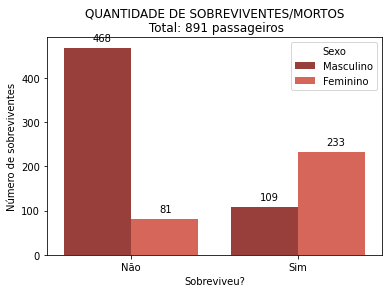

In [25]:
#quantidades de sobreviventes e mortos na tragédia

passageiros = sns.countplot(data=titanic, x='Sobreviveu?', hue='Sexo', palette='Reds_d')

#posicionando valores acima das barras
for p in passageiros.patches:
    b=p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE SOBREVIVENTES/MORTOS\n Total: %s passageiros' % (titanic.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

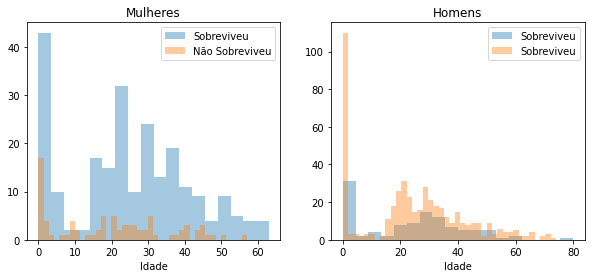

In [30]:
sobreviveu = 'Sobreviveu'
nao_sobreviveu = 'Não Sobreviveu'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
mulheres = titanic[titanic['Sexo']== 'Feminino']
homens = titanic[titanic['Sexo']== 'Masculino']
ax = sns.distplot(mulheres[mulheres['Sobreviveu?'] == 'Sim'].Idade.dropna(), bins = 18, label = sobreviveu, ax= axes[0], kde= False)
ax = sns.distplot(mulheres[mulheres['Sobreviveu?'] == 'Não'].Idade.dropna(), bins=40, label = nao_sobreviveu, ax = axes[0], kde= False)
ax.legend()
ax.set_title('Mulheres')
ax = sns.distplot(homens[homens['Sobreviveu?'] == 'Sim'].Idade.dropna(), bins= 18, label = sobreviveu, ax = axes[1], kde = False )
ax = sns.distplot(homens[homens['Sobreviveu?'] == 'Não'].Idade.dropna(), bins= 40, label = sobreviveu, ax = axes[1], kde = False )
ax.legend()
_ = ax.set_title('Homens')